In [1]:
from dataloader import *
from model import *
from train_eval_test import *
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import pandas as pd

2024-01-05 14:37:23.421195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-05 14:37:23.546000: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 14:37:24.200690: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.6/lib64:/usr/local/cuda-12.2/lib64
2024-01-05 14:37:24.200784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

## Load data

In [2]:
ecl_data = pd.read_csv('data/electricity.csv', header=None).to_numpy()

In [3]:
batch_size = 32
n_train = 18317
n_eval = 2633
n_test = 5261
train_loader, eval_loader, test_loader = get_loaders(ecl_data, batch_size, n_train, n_eval, n_test, T=96, S=96)

## Train

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
writer = SummaryWriter()

cuda


In [6]:
N = 321 #nb variables
T = 96 #input length (lookback window)
D = 512 # 256 ou 512
S = 96 # 96 ou 192, 336, 720
proj_dim = 128
num_blocks = 4 #2 ou 3 ou 4 (nombre de block de transformer)

itransformer = iTransformer(N, T, D, S, proj_dim, num_blocks).to(device)
optimizer = torch.optim.Adam(itransformer.parameters(), lr=1e-3) #10−3, 5 × 10−4, 10−4 



In [7]:
loss_values, loss_eval = train(itransformer, optimizer, train_loader, eval_loader, 10, device, writer)

---- epoch :  0
loss train : 0.19983696075553828
loss eval : 0.14628023954180927
---- epoch :  1
loss train : 0.16218700731662636
loss eval : 0.13863942307698263
---- epoch :  2
loss train : 0.15384554476649673
loss eval : 0.1345893427149042
---- epoch :  3
loss train : 0.14934724812417224
loss eval : 0.1338853102612805
---- epoch :  4
loss train : 0.14673388089715278
loss eval : 0.1308871769866386
---- epoch :  5
loss train : 0.1451909991746647
loss eval : 0.12994879629317815
---- epoch :  6
loss train : 0.14063530352222856
loss eval : 0.12996216311857298
---- epoch :  7
loss train : 0.13866251877901625
loss eval : 0.1347346149094693
---- epoch :  8
loss train : 0.13663491307112274
loss eval : 0.13222667129782886
---- epoch :  9
loss train : 0.13137179433090557
loss eval : 0.12866487837844082


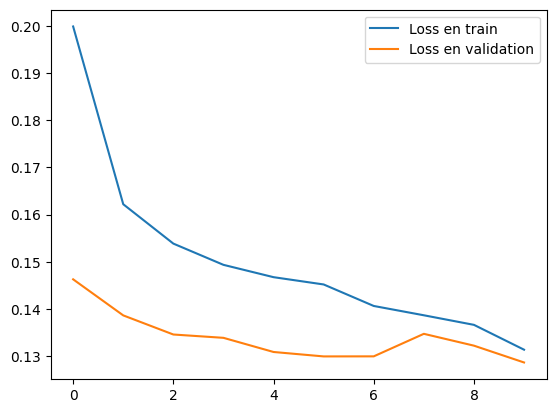

In [8]:
plt.figure()
plt.plot(loss_values,label="Loss en train")
plt.plot(loss_eval,label="Loss en validation")
plt.legend()
plt.show()

## Test

In [9]:
loss_test, loss_mae, target, yhat = test(itransformer, test_loader, device)
print("MSE : ", loss_test)
print("MAE : ", loss_mae)

MSE :  0.14048731804658204
MAE :  0.24267781831515142


Affichage pour une modalité sur toute la durée de la prédiction

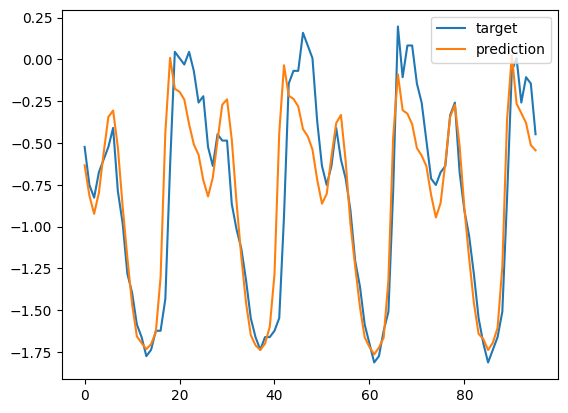

In [10]:
i = 1
plt.figure()
plt.plot(target[0,:,i].to("cpu"),label="target")
plt.plot(yhat[0,:,i].to("cpu"),label="prediction")
plt.legend()
plt.show()

Affichage de toutes les modalités à un instant t

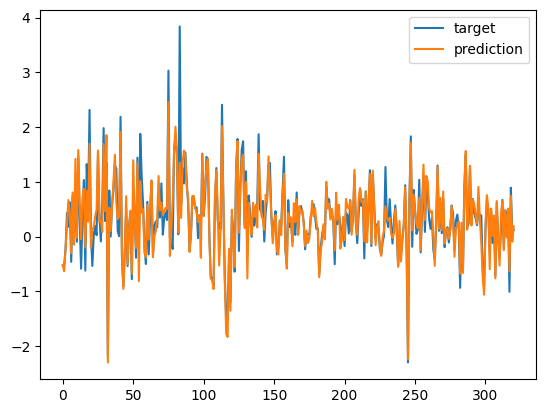

In [11]:
plt.figure()
plt.plot(target[0,0,:].to("cpu"),label="target")
plt.plot(yhat[0,0,:].to("cpu"),label="prediction")
plt.legend()
plt.show()